# **Lab Excercise-02:Creating a Regression Model Using Artificial Neural Networks (ANN)**

* Created By : Blessy Louis (2348416)
* Created On : 13.07.2024
* Submitted On:

## **Dataset Description**

### Data Description

The `autos.csv` dataset contains detailed information about used cars listed for sale, with various features to help analyze the factors influencing used car prices. Here is a detailed description of each column in the dataset:

1. **dateCrawled**: The date when the car listing was crawled or scraped from the source. This is a date column.
   
2. **name**: The name or title of the car listing, which typically includes the brand, model, and other descriptive information. This is a string column.

3. **seller**: The type of seller listing the car, which can either be a private seller or a dealer. This is a string column.

4. **offerType**: The type of offer for the car. While the primary type is likely to be 'sale', it could also include other types such as 'repair'. This is a string column.

5. **price**: The price of the car in the listing. This is an integer column representing the price in the currency of the dataset.

6. **abtest**: A/B test group assignment, which can either be 'A' or 'B'. This is used to compare different versions of a feature or treatment in an experiment. This is a string column.

7. **vehicleType**: The type of vehicle, such as SUV, sedan, hatchback, etc. This is a string column.

8. **yearOfRegistration**: The year when the car was first registered. This is an integer column.

9. **gearbox**: The type of gearbox in the car, which can either be 'manual' or 'automatic'. This is a string column.

10. **powerPS**: The power of the car in Pferdestärke (PS), a German unit of power equivalent to horsepower. This is an integer column.

11. **model**: The model of the car. This is a string column.

12. **kilometer**: The total kilometers driven by the car. This is an integer column.

13. **monthOfRegistration**: The month when the car was first registered. This is an integer column.

14. **fuelType**: The type of fuel used by the car, such as diesel, petrol, electric, etc. This is a string column.

15. **brand**: The brand or manufacturer of the car. This is a string column.

16. **notRepairedDamage**: Indicates whether the car has any damage that has not been repaired. This can be 'yes' or 'no'. This is a string column.

17. **dateCreated**: The date when the car listing was created. This is a date column.

18. **nrOfPictures**: The number of pictures included in the car listing. This is an integer column.

19. **postalCode**: The postal code where the car is located. This is an integer column.

20. **lastSeen**: The date when the car listing was last seen online. This is a date column.

Each of these columns provides specific information that can be useful for analyzing the market for used cars, understanding price determinants, and identifying trends in the types of vehicles being sold.

Import Libraries

In [15]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import r2_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
import seaborn as sns


**Explanation**:
- **numpy**: A library for numerical computations.
- **pandas**: A library for data manipulation and analysis.
- **sklearn.model_selection.train_test_split**: A function to split the dataset into training and testing sets.
- **sklearn.preprocessing.StandardScaler**: A tool to standardize features by removing the mean and scaling to unit variance.
- **sklearn.preprocessing.OneHotEncoder**: A tool to convert categorical variables into a format that can be provided to machine learning algorithms to do a better job in prediction.
- **sklearn.compose.ColumnTransformer**: A tool to apply different preprocessing techniques to different columns of a dataframe.
- **tensorflow.keras.models.Sequential**: A Keras model that is a linear stack of layers.
- **tensorflow.keras.layers.Dense**: A fully connected neural network layer.
- **tensorflow.keras.callbacks.History**: A Keras callback that records events into a `History` object during training.
- **matplotlib.pyplot**: A plotting library for Python.

Load and Inspect Data

In [6]:
# Load the dataset
data = pd.read_csv('autos.csv')

# Display the first few rows of the dataset
print(data.head())

# Display dataset information
print(data.info())

# Display summary statistics
print(data.describe())


   index          dateCrawled                            name  seller  \
0      0  2016-03-24 11:52:17                      Golf_3_1.6  privat   
1      1  2016-03-24 10:58:45            A5_Sportback_2.7_Tdi  privat   
2      2  2016-03-14 12:52:21  Jeep_Grand_Cherokee_"Overland"  privat   
3      3  2016-03-17 16:54:04              GOLF_4_1_4__3TÜRER  privat   
4      4  2016-03-31 17:25:20  Skoda_Fabia_1.4_TDI_PD_Classic  privat   

  offerType  price abtest vehicleType  yearOfRegistration    gearbox  ...  \
0   Angebot    480   test         NaN                1993    manuell  ...   
1   Angebot  18300   test       coupe                2011    manuell  ...   
2   Angebot   9800   test         suv                2004  automatik  ...   
3   Angebot   1500   test  kleinwagen                2001    manuell  ...   
4   Angebot   3600   test  kleinwagen                2008    manuell  ...   

   model kilometer  monthOfRegistration  fuelType       brand  \
0   golf    150000               

**Explanation**:
- **Load the dataset**: Reads the data from a CSV file into a pandas DataFrame.
- **data.head()**: Displays the first few rows of the dataset to get an initial look at the data.
- **data.info()**: Provides a concise summary of the DataFrame, including the number of non-null entries and the data type of each column.
- **data.describe()**: Generates descriptive statistics that summarize the central tendency, dispersion, and shape of the dataset’s distribution.

Data Preprocessing

In [7]:
data = data.dropna()

# Verify no missing values
print(data.isnull().sum())

# Detect and treat outliers using IQR
def treat_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Remove outliers
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

# Apply outlier treatment for 'price' and 'powerPS'
data = treat_outliers(data, 'price')
data = treat_outliers(data, 'powerPS')

# Encode categorical variables
label_encoders = {}
for column in ['seller', 'offerType', 'abtest', 'vehicleType', 'gearbox', 'model', 'fuelType', 'brand', 'notRepairedDamage']:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column].astype(str))

# Select features and target variable
X = data[['yearOfRegistration', 'powerPS', 'kilometer', 'monthOfRegistration', 'seller', 'offerType',
          'abtest', 'vehicleType', 'gearbox', 'model', 'fuelType', 'brand', 'notRepairedDamage', 'nrOfPictures', 'postalCode']]
y = data['price']


index                  0
dateCrawled            0
name                   0
seller                 0
offerType              0
price                  0
abtest                 0
vehicleType            0
yearOfRegistration     0
gearbox                0
powerPS                0
model                  0
kilometer              0
monthOfRegistration    0
fuelType               0
brand                  0
notRepairedDamage      0
dateCreated            0
nrOfPictures           0
postalCode             0
lastSeen               0
dtype: int64


**Explanation**:
- **Handle missing values**: Removes any rows with missing values.
- **Separate features and target variable**: Splits the dataset into features (`X`) and the target variable (`y`).
- **Define categorical and numerical features**: Identifies which columns are categorical and which are numerical.
- **ColumnTransformer**: Applies different preprocessing steps to different subsets of columns. In this case, it scales numerical features and one-hot encodes categorical features.
- **fit_transform**: Fits the transformer to the data and then transforms it. `.toarray()` converts the resulting sparse matrix to a dense array.

### Outlier Detection and Treatment
Outliers in numerical features (`price` and `powerPS`) are detected and treated using the Interquartile Range (IQR) method. Outliers can significantly impact model performance, hence this step helps in ensuring that the model is not unduly influenced by extreme values.

Build ANN Model

In [24]:
# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Standardize the target variable
scaler_y = StandardScaler()
y_train = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).flatten()
y_test = scaler_y.transform(y_test.values.reshape(-1, 1)).flatten()


# Initialize the ANN model
model = Sequential()

# Add input layer and first hidden layer
model.add(Dense(units=64, activation='linear', input_dim=X_train.shape[1]))

# Add second hidden layer
model.add(Dense(units=32, activation='linear'))

# Add output layer with linear activation (default)
model.add(Dense(units=1, activation='linear'))

# Compile the model with additional metrics
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_squared_error', 'mean_absolute_error'])

* Categorical variables in the dataset (`seller`, `offerType`, `abtest`, etc.) are encoded using `LabelEncoder` from `sklearn.preprocessing`. This step converts categorical data into numerical format suitable for machine learning models. Features (`X`) and target variable (`y`) are then selected based on their relevance to predicting the car prices.

* The dataset is split into training and test sets (`X_train`, `X_test`, `y_train`, `y_test`) using `train_test_split` from `sklearn.model_selection`. Numerical features are standardized using `StandardScaler` to ensure all features have a similar scale, which helps the model converge faster during training.

**Explanation**:
- **Sequential**: Initializes a sequential model.
- **Dense(64, input_dim=X.shape[1], activation='linear')**: Adds a dense layer with 64 units, linear activation, and an input dimension equal to the number of features in `X`.
- **Dense(32, activation='linear')**: Adds another dense layer with 32 units and linear activation.

- **Dense(1)**: Adds an output layer with 1 unit (for regression).
- **compile**: Configures the model for training. Uses the Adam optimizer, mean squared error as the loss function, and mean absolute error as an additional metric.

Train the model

In [25]:
# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)


Epoch 1/50
4782/4782 [==============================] - 18s 4ms/step - loss: 0.9582 - mean_squared_error: 0.9582 - mean_absolute_error: 0.4806 - val_loss: 0.5052 - val_mean_squared_error: 0.5052 - val_mean_absolute_error: 0.4717
Epoch 2/50
4782/4782 [==============================] - 17s 4ms/step - loss: 1.0158 - mean_squared_error: 1.0158 - mean_absolute_error: 0.4786 - val_loss: 0.4319 - val_mean_squared_error: 0.4319 - val_mean_absolute_error: 0.4710
Epoch 3/50
4782/4782 [==============================] - 17s 4ms/step - loss: 0.5270 - mean_squared_error: 0.5270 - mean_absolute_error: 0.4747 - val_loss: 0.4472 - val_mean_squared_error: 0.4472 - val_mean_absolute_error: 0.4712
Epoch 4/50
4782/4782 [==============================] - 17s 3ms/step - loss: 0.4875 - mean_squared_error: 0.4875 - mean_absolute_error: 0.4745 - val_loss: 0.4406 - val_mean_squared_error: 0.4406 - val_mean_absolute_error: 0.4733
Epoch 5/50
4782/4782 [==============================] - 17s 4ms/step - loss: 0.4452 

**Explanation**:
- **train_test_split**: Splits the data into training (80%) and testing (20%) sets.
- **fit**: Trains the model on the training data. `epochs=50` means the model will go through the entire training set 50 times. `batch_size=32` means the model will update its weights after every 32 samples. `validation_split=0.2` means 20% of the training data will be used for validation.

Evaluate the model

In [26]:
# Evaluate the model
loss, mse, mae = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')
print(f'Test Mean Squared Error (MSE): {mse}')
print(f'Test Mean Absolute Error (MAE): {mae}')


1495/1495 [==============================] - 3s 2ms/step - loss: 0.4267 - mean_squared_error: 0.4267 - mean_absolute_error: 0.4704
Test Loss: 0.42670947313308716
Test Mean Squared Error (MSE): 0.42670947313308716
Test Mean Absolute Error (MAE): 0.47038203477859497


**Explanation**:
- **evaluate**: Computes the loss and any additional metrics on the test data.
- **Print the test Mean Absolute Error (MAE)**: Provides an idea of how well the model performs on unseen data.

Predictions

In [27]:

# Make predictions
y_pred = model.predict(X_test)

# Reverse the scaling for better interpretation
y_test = scaler_y.inverse_transform(y_test.reshape(-1, 1)).flatten()
y_pred = scaler_y.inverse_transform(y_pred).flatten()
# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2}')

# Calculate Adjusted R-squared
n = X_test.shape[0]  # number of observations
k = X_test.shape[1]  # number of predictors
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - k - 1)
print(f'Adjusted R-squared: {adjusted_r2}')

# Compare predictions with actual values
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred.flatten()})
print(comparison.head())


1495/1495 [==============================] - 2s 1ms/step
R-squared: 0.5684376889013238
Adjusted R-squared: 0.5683022585645704
    Actual    Predicted
0    900.0  1719.936401
1   1600.0  6098.153809
2   4444.0  4901.270508
3  11490.0  8586.150391
4   2800.0  4848.763672


- **predict**: Generates predictions for the test data.
- **Create a comparison DataFrame**: Combines the actual values with the predicted values for easier comparison.
- **Print the comparison DataFrame**: Displays the first few rows of the actual and predicted values.


Visualize the train history

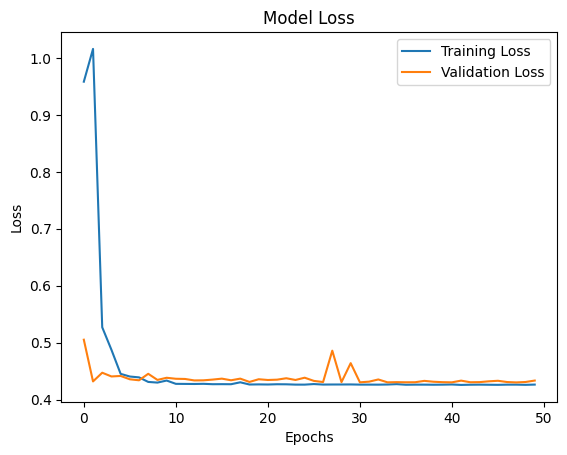

In [28]:
# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

**Explanation**:
- **Plot the training and validation loss**: Visualizes how the model's loss decreases over time for both the training and validation sets. This helps to understand the learning process of the model and identify any overfitting or underfitting issues.

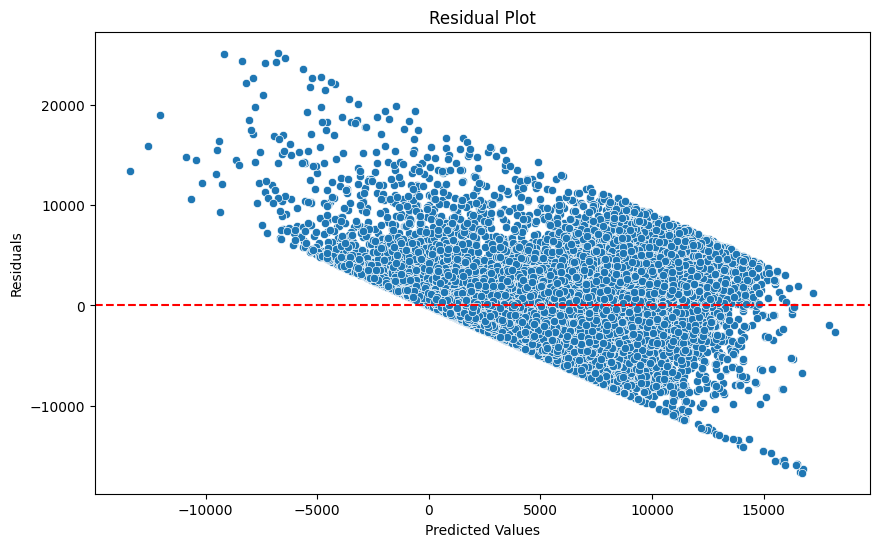

In [29]:
# Plot 1: Residual Plot
residuals = y_test - y_pred.flatten()
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred.flatten(), y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

The residuals appear to be scattered somewhat randomly around the horizontal line at y = 0. However, there does seem to be a slight trend of positive residuals at higher predicted values. This suggests that the model may be slightly underpredicting the values of residential plots at higher price points.

It is important to note that a residual plot is just one tool for assessing the fit of a model. Other diagnostic tools should also be used to get a more complete picture of how well the model fits the data.

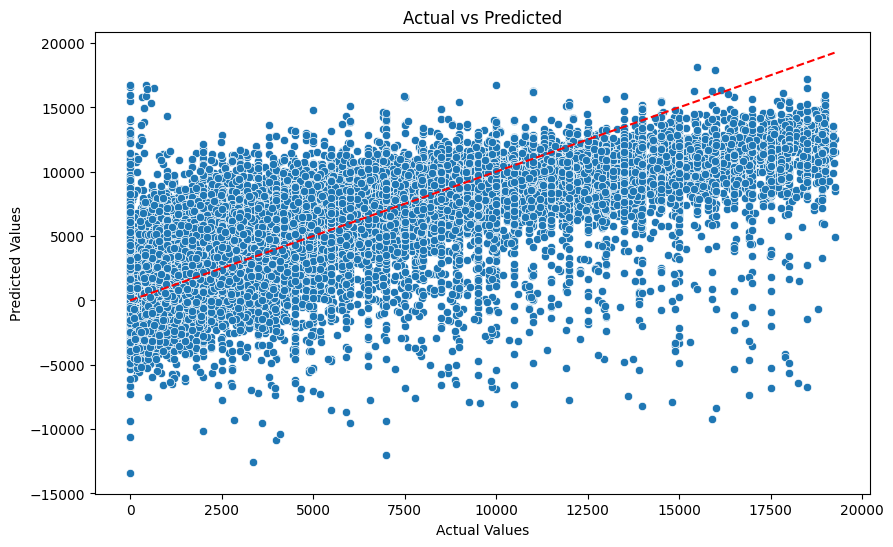

In [30]:
# Plot 2: Actual vs. Predicted Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred.flatten())
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='r', linestyle='--')
plt.title('Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

The actual values are on the y-axis and the predicted values are on the x-axis. The title of the graph is "Actual vs Predicted".

The data points in the scatter plot fall mostly above the diagonal line. This means that the predicted values are generally lower than the actual values. For example, at a predicted value of 7,500, the actual value is around 10,000. There are a few data points that fall below the diagonal line, which means that the predicted value was higher than the actual value.

Overall, the scatter plot shows that the model used to predict the production values tends to underestimate the actual production values.

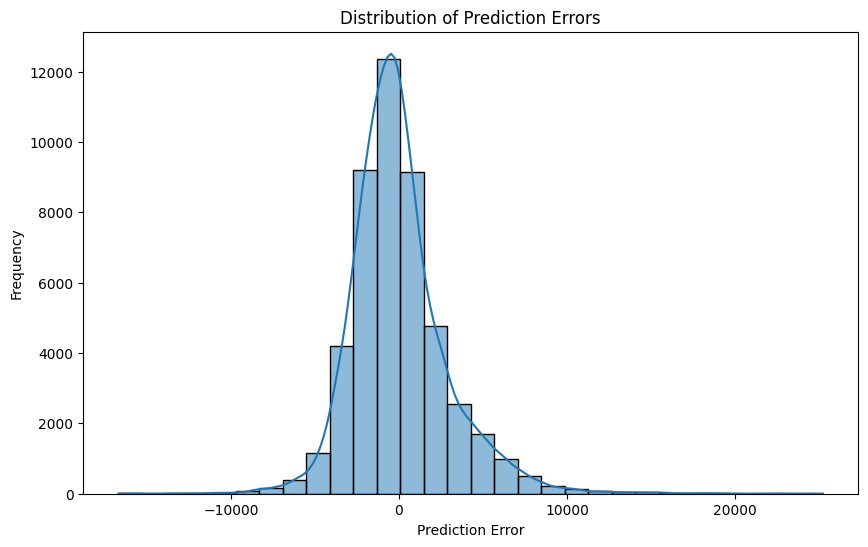

In [31]:
# Plot 3: Distribution of Prediction Errors
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, bins=30)
plt.title('Distribution of Prediction Errors')
plt.xlabel('Prediction Error')
plt.ylabel('Frequency')
plt.show()

###  Model Architecture Definition
An Artificial Neural Network (ANN) model is defined using `Sequential` from `tensorflow.keras.models`. The model architecture includes an input layer, multiple hidden layers with `ReLU` activation functions for introducing non-linearity, and an output layer with a linear activation function suitable for regression tasks.

###  Model Compilation and Training
The model is compiled using `adam` optimizer and `mean_squared_error` loss function, which is appropriate for regression tasks. Additional metrics such as `mean_squared_error` and `mean_absolute_error` are included to monitor model performance during training. The model is trained for a specified number of epochs (`100` epochs in this case) with a batch size of `32`.

###  Model Evaluation
After training, the model's performance is evaluated on the test set using `evaluate` method from `tensorflow.keras.models.Sequential`. Metrics such as `Test Loss`, `Test Mean Squared Error (MSE)`, and `Test Mean Absolute Error (MAE)` are calculated to assess how well the model predicts car prices based on the given features.

###  Performance Metrics Calculation
Post evaluation, additional metrics such as `R-squared` and `Adjusted R-squared` are computed using `r2_score` from `sklearn.metrics`. These metrics provide insights into how well the model fits the data and whether it outperforms a simple mean-based model.

### Visualization of Model Training and Prediction
Finally, various visualizations are created to better understand the model's behavior and performance. These include plots of training and validation loss over epochs, a residual plot to examine prediction errors, an actual vs. predicted plot to visualize model accuracy, and a distribution plot of prediction errors.

By following these tasks systematically, we ensure a structured approach to building and evaluating the regression model for predicting used car prices based on the provided dataset. Each step contributes to improving the model's accuracy and reliability in real-world applications.